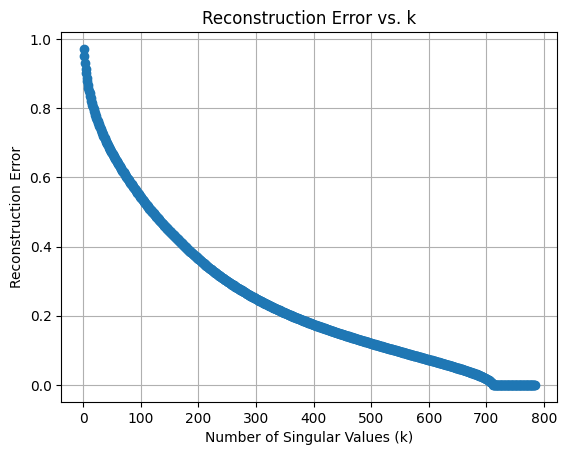

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy
from sklearn.preprocessing import StandardScaler

X_train = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train.reshape(X_train.shape[0], -1)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

np.save('X_train_normalized.npy', X_train_normalized)

X = np.load('X_train_normalized.npy')

cov_matrix = np.cov(X, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

k_values = range(1, min(X.shape) + 1)

reconstruction_errors = []

for k in k_values:
    top_k_eigenvectors = eigenvectors[:, :k]
    
    reconstructed_X = np.dot(top_k_eigenvectors, np.dot(top_k_eigenvectors.T, X.T)).T
    
    reconstruction_error = np.linalg.norm(X - reconstructed_X) / np.linalg.norm(X)
    reconstruction_errors.append(reconstruction_error)

plt.plot(k_values, reconstruction_errors, marker='o')
plt.xlabel('Number of Singular Values (k)')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. k')
plt.grid(True)
plt.show()